# Stage: Feature Extraction

In [1]:
import pandas as pd
import regex
import requests
import unidecode
import numpy as np
import os, glob
import cv2
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil, sys
import urllib.request 
from wordcloud import WordCloud
import PIL
import tensorflow as tf
import keras
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD

2022-09-19 19:06:15.721373: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from IPython.display import Image
from keras.preprocessing import image 
from keras import optimizers 
from keras import layers, models 
from keras.applications.imagenet_utils import preprocess_input
from keras import regularizers 
from keras.preprocessing.image import ImageDataGenerator 
from keras.applications.vgg16 import VGG16

In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
# TO-DO: 
# SET RANDOM SEED IN A FIXED VALUE

Multiple nets: https://medium.com/analytics-vidhya/multi-class-image-classification-using-transfer-learning-with-deep-convolutional-neural-networks-eab051cde3fb


Current tutorial: https://www.kaggle.com/code/shahules/getting-started-with-cnn-and-vgg16 

In [5]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory("images_train/",class_mode='categorical',batch_size=64,target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = trdata.flow_from_directory("images_test/",class_mode='categorical',batch_size=64,target_size=(224,224))

Found 22362 images belonging to 32 classes.
Found 4793 images belonging to 32 classes.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(32,activation='sigmoid'))

2022-09-13 23:44:55.851317: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
epochs=10
history=model.fit_generator(train_it,steps_per_epoch=50,epochs=10,validation_data=test_it,validation_steps=10)

/var/folders/_2/mn5plcvd0135m5y5pgyz6zpm0000gn/T/ipykernel_91272/2286968572.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_it,steps_per_epoch=50,epochs=10,validation_data=test_it,validation_steps=10)


Epoch 1/10
50/50 [==============================] - 102s 2s/step - loss: 10.5114 - acc: 0.0629 - val_loss: 3.4286 - val_acc: 0.0531
Epoch 2/10
50/50 [==============================] - 99s 2s/step - loss: 3.3294 - acc: 0.0894 - val_loss: 3.3078 - val_acc: 0.1125
Epoch 3/10
50/50 [==============================] - 97s 2s/step - loss: 3.2434 - acc: 0.1197 - val_loss: 3.2209 - val_acc: 0.1297
Epoch 4/10
50/50 [==============================] - 96s 2s/step - loss: 3.0697 - acc: 0.1772 - val_loss: 3.0835 - val_acc: 0.1641
Epoch 5/10
50/50 [==============================] - 95s 2s/step - loss: 3.0131 - acc: 0.1894 - val_loss: 3.0628 - val_acc: 0.1656
Epoch 6/10
50/50 [==============================] - 94s 2s/step - loss: 2.9079 - acc: 0.2147 - val_loss: 3.1138 - val_acc: 0.1625
Epoch 7/10
50/50 [==============================] - 139s 3s/step - loss: 2.8472 - acc: 0.2300 - val_loss: 2.9568 - val_acc: 0.2125
Epoch 8/10
50/50 [==============================] - 102s 2s/step - loss: 2.6953 - acc: 

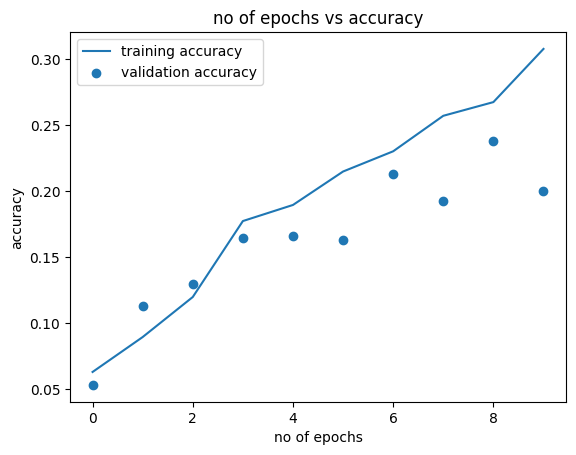

In [7]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

In [ ]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

Improving model using VGG16

In [8]:
model_vg=VGG16(weights='imagenet',include_top=False)
model_vg.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [16]:
def extract_features(directory,samples,df):
    
    batch_size = 64
    features=np.zeros(shape=(samples,4,4,512))
    labels=np.zeros(shape=(samples))
    generator=datagen.flow_from_dataframe(dataframe=df,directory=directory,x_col='id',
                                            y_col='has_cactus',class_mode='other',batch_size=batch_size,
                                            target_size=(150,150))
    i=0
    for input_batch,label_batch in generator:
        feature_batch=model_vg.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size]=feature_batch
        labels[i*batch_size:(i+1)*batch_size]=label_batch
        i+=1
        if(i*batch_size>samples):
            break
    return(features,labels)

from pathlib import Path  
cwd = os.getcwd()

train_dir = Path(cwd+'/dataset_train.csv')  
features,labels=extract_features(train_dir,17500,train_it)
train_features=features[:15001]
train_labels=labels[:15001]

validation_features=features[15000:]
validation_labels=labels[15000:]

AttributeError: 'DirectoryIterator' object has no attribute 'copy'

In [ ]:
test_dir = Path(cwd+'/dataset_test.csv')  
test_features,test_labels=extract_features(test_dir,4000,df_test)

In [ ]:
train_features=train_features.reshape((15001,4*4*512))
validation_features=validation_features.reshape((2500,4*4*512))

test_features=test_features.reshape((4000,4*4*512))

In [ ]:
model=models.Sequential()
model.add(layers.Dense(212,activation='relu',kernel_regularizer=regularizers.l1_l2(.001),input_dim=(4*4*512)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation='sigmoid'))

In [ ]:
model.compile(optimizer=optimizers.rmsprop(),loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(train_features,train_labels,epochs=30,batch_size=15,validation_data=(validation_features,validation_labels))

In [ ]:
y_pre=model.predict_proba(test_features)

## Test # 2 VGG 16

In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory("images_train/",class_mode='categorical',batch_size=64,target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = trdata.flow_from_directory("images_test/",class_mode='categorical',batch_size=64,target_size=(224,224))

Found 22362 images belonging to 32 classes.
Found 4793 images belonging to 32 classes.


In [16]:
train_datagen = ImageDataGenerator( rescale = 1.0/255,shear_range=0.2,zoom_range=0.2)
train_dir = "images_train/"
# we are rescaling by 1.0/255 to normalize the rgb values if they are in range 0-255 the values are too high for good model performance. 
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 22362 images belonging to 32 classes.


In [17]:
test_DIR = "images_test/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255) #we are only normalising to make the prediction, the other parameters were used for agumentation and train weights
validation_generator = validation_datagen.flow_from_directory(test_DIR, shuffle=True, batch_size=32, class_mode='categorical', target_size=(150, 150))


Found 4793 images belonging to 32 classes.


In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

2022-09-14 20:54:02.782471: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=32, activation="softmax"))

In [23]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/Users/adelaidazuluaga/.pyenv/versions/3.10.5/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [25]:
vgg16_model = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(224,224,3))
for layers in vgg16_model.layers:
            layers.trainable=False
last_output = vgg16_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(128, activation = 'relu')(vgg_x)
vgg_x = Dense(32, activation = 'softmax')(vgg_x)
vgg16_final_model = tf.keras.Model(vgg16_model.input, vgg_x)
vgg16_final_model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['acc'])
     
# VGG16 
number_of_epochs = 10
vgg16_filepath = 'vgg_16_'+'-saved-model-{epoch:02d}-acc-{val_acc:.2f}.hdf5'
vgg_checkpoint = tf.keras.callbacks.ModelCheckpoint(vgg16_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
vgg_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
#vgg16_history = vgg16_final_model.fit_generator(steps_per_epoch=100,train_generator, epochs = number_of_epochs ,validation_data = validation_generator,callbacks=[vgg_checkpoint,vgg_early_stopping],,validation_steps=10,verbose=1)
hist = vgg16_final_model.fit_generator(steps_per_epoch=100,generator=train_generator, validation_data= validation_generator, validation_steps=10,epochs=100,callbacks=[vgg_checkpoint,vgg_early_stopping],verbose=1)

/var/folders/_2/mn5plcvd0135m5y5pgyz6zpm0000gn/T/ipykernel_95920/878127441.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = vgg16_final_model.fit_generator(steps_per_epoch=100,generator=train_generator, validation_data= validation_generator, validation_steps=10,epochs=100,callbacks=[vgg_checkpoint,vgg_early_stopping],verbose=1)


Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 3.2659 - acc: 0.1456
Epoch 1: val_acc improved from -inf to 0.20937, saving model to vgg_16_-saved-model-01-acc-0.21.hdf5
100/100 [==============================] - 458s 5s/step - loss: 3.2659 - acc: 0.1456 - val_loss: 2.9979 - val_acc: 0.2094
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 2.8332 - acc: 0.2519
Epoch 2: val_acc improved from 0.20937 to 0.30312, saving model to vgg_16_-saved-model-02-acc-0.30.hdf5
100/100 [==============================] - 541s 5s/step - loss: 2.8332 - acc: 0.2519 - val_loss: 2.6903 - val_acc: 0.3031
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 2.5602 - acc: 0.3191
Epoch 3: val_acc improved from 0.30312 to 0.34062, saving model to vgg_16_-saved-model-03-acc-0.34.hdf5
100/100 [==============================] - 466s 5s/step - loss: 2.5602 - acc: 0.3191 - val_loss: 2.5609 - val_acc: 0.3406
Epoch 4/100
100/100 [============================

100/100 [==============================] - 685s 7s/step - loss: 1.7508 - acc: 0.4947 - val_loss: 2.0282 - val_acc: 0.4969
Epoch 30/100
100/100 [==============================] - ETA: 0s - loss: 1.7822 - acc: 0.4906
Epoch 30: val_acc did not improve from 0.49687
100/100 [==============================] - 690s 7s/step - loss: 1.7822 - acc: 0.4906 - val_loss: 2.1492 - val_acc: 0.4031
Epoch 31/100
100/100 [==============================] - ETA: 0s - loss: 1.7491 - acc: 0.4997
Epoch 31: val_acc did not improve from 0.49687
100/100 [==============================] - 689s 7s/step - loss: 1.7491 - acc: 0.4997 - val_loss: 2.0157 - val_acc: 0.4219
Epoch 32/100
100/100 [==============================] - ETA: 0s - loss: 1.7520 - acc: 0.4906
Epoch 32: val_acc did not improve from 0.49687
100/100 [==============================] - 686s 7s/step - loss: 1.7520 - acc: 0.4906 - val_loss: 2.0727 - val_acc: 0.4531
Epoch 33/100
100/100 [==============================] - ETA: 0s - loss: 1.7284 - acc: 0.5153

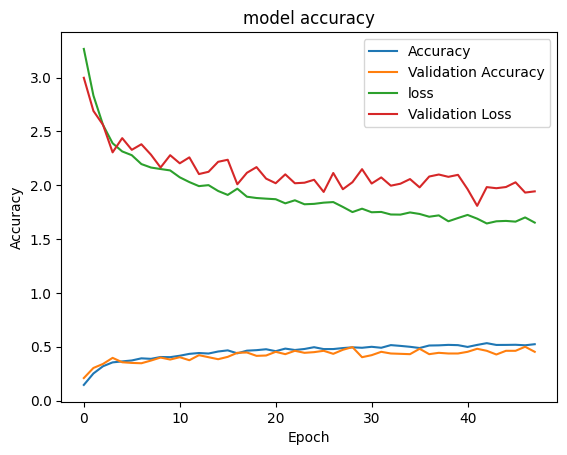

In [26]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

# Test #3: Image Net

In [31]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory("images_train/",class_mode='categorical',batch_size=64,target_size=(150,150))
tsdata = ImageDataGenerator()
testdata = trdata.flow_from_directory("images_test/",class_mode='categorical',batch_size=64,target_size=(150,150))

Found 22362 images belonging to 32 classes.
Found 4793 images belonging to 32 classes.


In [37]:
from keras.callbacks import ReduceLROnPlateau
ResNet50_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(150,150,3), classes=6)

for layers in ResNet50_model.layers:
    layers.trainable=True

opt = SGD(lr=0.01,momentum=0.7)
resnet50_x = Flatten()(ResNet50_model.output)
resnet50_x = Dense(256,activation='relu')(resnet50_x)
resnet50_x = Dense(32,activation='softmax')(resnet50_x)
resnet50_x_final_model = tf.keras.Model(inputs=ResNet50_model.input, outputs=resnet50_x)
resnet50_x_final_model.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics=['acc'])

number_of_epochs = 60
resnet_filepath = 'resnet50'+'-saved-model-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5'
resnet_checkpoint = tf.keras.callbacks.ModelCheckpoint(resnet_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
resnet_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002)
callbacklist = [resnet_checkpoint,resnet_early_stopping,reduce_lr]
resnet50_history = resnet50_x_final_model.fit_generator(steps_per_epoch= 100, generator=traindata, epochs = number_of_epochs ,validation_data = testdata,callbacks=callbacklist,verbose=1)
#hist = resnet50_x_final_model.fit_generator(steps_per_epoch=100,generator=train_generator, validation_data= validation_generator, validation_steps=10,epochs=100,callbacks=[vgg_checkpoint,vgg_early_stopping],verbose=1)

/var/folders/_2/mn5plcvd0135m5y5pgyz6zpm0000gn/T/ipykernel_95920/1274185450.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resnet50_history = resnet50_x_final_model.fit_generator(steps_per_epoch= 100, generator=traindata, epochs = number_of_epochs ,validation_data = testdata,callbacks=callbacklist,verbose=1)


Epoch 1/60
100/100 [==============================] - ETA: 0s - loss: 2.5082 - acc: 0.3448 
Epoch 1: val_acc improved from -inf to 0.38014, saving model to resnet50-saved-model-01-val_acc-0.38.hdf5
100/100 [==============================] - 2917s 29s/step - loss: 2.5082 - acc: 0.3448 - val_loss: 2.3248 - val_acc: 0.3801 - lr: 0.0100
Epoch 2/60
100/100 [==============================] - ETA: 0s - loss: 1.6430 - acc: 0.5420 
Epoch 2: val_acc improved from 0.38014 to 0.43438, saving model to resnet50-saved-model-02-val_acc-0.43.hdf5
100/100 [==============================] - 2166s 22s/step - loss: 1.6430 - acc: 0.5420 - val_loss: 2.0810 - val_acc: 0.4344 - lr: 0.0100
Epoch 3/60
100/100 [==============================] - ETA: 0s - loss: 1.2970 - acc: 0.6280 
Epoch 3: val_acc improved from 0.43438 to 0.48467, saving model to resnet50-saved-model-03-val_acc-0.48.hdf5
100/100 [==============================] - 2701s 27s/step - loss: 1.2970 - acc: 0.6280 - val_loss: 1.8895 - val_acc: 0.4847 - 

KeyboardInterrupt: 

# Image Feature Extraction

In [7]:
import os
from PIL import Image
import numpy as np
from pathlib import Path  

In [56]:
cwd = os.getcwd()
filepath = Path(cwd+'/dataset_sub_cats.csv')  
df_subcat = pd.read_csv(filepath)

In [58]:
df_subcat['numeric_sub_cat'].nunique()

351

In [5]:
def extract_features(directory):
    model=tf.keras.applications.xception.Xception(include_top=False, pooling='avg')
    features = {}
    for (root,dirs,files) in tqdm(os.walk(directory)):
        for img in files: 
            filename = directory + "/" + img
            image = Image.open(filename)
            image = image.resize((299,299))
            image = np.expand_dims(image, axis=0)
            image = image/127.5
            image = image - 1.0
            feature = model.predict(image)
            features[img] = feature
    return features

In [19]:
cwd

'/Users/adelaidazuluaga/Documents/AdelaidaZuluaga'

In [28]:
out_ = extract_features('/Users/adelaidazuluaga/Documents/AdelaidaZuluaga/sub_images__/belleza y cuidado personal')

0it [00:00, ?it/s]

1/1 [==============================] - 0s 248ms/step


1/1 [==============================] - 0s 249ms/step


1/1 [==============================] - 0s 247ms/step


1/1 [==============================] - 0s 252ms/step


1/1 [==============================] - 0s 256ms/step


1it [03:24, 204.50s/it]


In [33]:
out_['belleza y cuidado personal633.jpg'].shape

(1, 2048)

Cada imagen se traduce en un vector de 1x2048

## Image feature with VGG16

In [39]:
!pip install split-folders

In [41]:
import splitfolders

cwd = os.getcwd()
filepath = Path(cwd+'/sub_images__')  

splitfolders.ratio(Path(cwd+'/sub_images__')  , # The location of dataset
                   Path(cwd+'/sub_images_split') , # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .2, .1), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )

Copying files: 19271 files [12:50, 25.01 files/s]


In [50]:
train_dir = Path(cwd+'/sub_images_split/train')
test_dir = Path(cwd+'/sub_images_split/test')

In [65]:
from keras.applications import VGG16

#### XCeption

In [96]:
cwd = os.getcwd()
filepath = Path(cwd+'/dataset_sub_cats.csv')  
df_subcat = pd.read_csv(filepath)
categorias_lista = list(df_subcat['categoria'].unique())

In [97]:
def extract_features(directory):
    model=tf.keras.applications.xception.Xception(include_top=False, pooling='avg')
    features = {}
    for (root,dirs,files) in os.walk(directory):
        for img in files: 
            filename = directory + "/" + img
            image = Image.open(filename)
            image = image.resize((299,299))
            image = np.expand_dims(image, axis=0)
            image = image/127.5
            image = image - 1.0
            feature = model.predict(image)
            features[img] = feature
    return features

In [ ]:
for c in tqdm(categorias_lista):
    imdir = f'/Users/adelaidazuluaga/Documents/AdelaidaZuluaga/sub_images__/{c}'
    out_ = extract_features(imdir)

  0%|                                                                                                                                                                              | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 301ms/step


1/1 [==============================] - 0s 298ms/step


1/1 [==============================] - 0s 266ms/step


1/1 [==============================] - 0s 316ms/step


1/1 [==============================] - 0s 245ms/step


1/1 [==============================] - 0s 338ms/step


1/1 [==============================] - 0s 333ms/step


1/1 [==============================] - 0s 278ms/step


  3%|█████                                                                                                                                                              | 1/32 [06:50<3:32:07, 410.56s/it]

1/1 [==============================] - 0s 308ms/step


1/1 [==============================] - 0s 265ms/step


1/1 [==============================] - 0s 266ms/step


  6%|██████████▏                                                                                                                                                        | 2/32 [09:16<2:07:22, 254.75s/it]

1/1 [==============================] - 0s 259ms/step


1/1 [==============================] - 0s 309ms/step


1/1 [==============================] - 0s 278ms/step


  9%|███████████████▎                                                                                                                                                   | 3/32 [11:24<1:35:15, 197.09s/it]

1/1 [==============================] - 0s 294ms/step


1/1 [==============================] - 0s 287ms/step


1/1 [==============================] - 0s 251ms/step


1/1 [==============================] - 0s 324ms/step


 12%|████████████████████▍                                                                                                                                              | 4/32 [14:28<1:29:30, 191.81s/it]

1/1 [==============================] - 0s 255ms/step


1/1 [==============================] - 0s 257ms/step


1/1 [==============================] - 0s 274ms/step


 16%|█████████████████████████▍                                                                                                                                         | 5/32 [17:01<1:19:59, 177.77s/it]

1/1 [==============================] - 0s 257ms/step


1/1 [==============================] - 0s 258ms/step


 19%|██████████████████████████████▌                                                                                                                                    | 6/32 [18:31<1:04:03, 147.84s/it]

1/1 [==============================] - 0s 244ms/step


1/1 [==============================] - 0s 292ms/step


1/1 [==============================] - 0s 322ms/step


1/1 [==============================] - 0s 278ms/step


1/1 [==============================] - 0s 251ms/step


 22%|███████████████████████████████████▋                                                                                                                               | 7/32 [22:22<1:13:03, 175.33s/it]

1/1 [==============================] - 0s 247ms/step


1/1 [==============================] - 0s 270ms/step


1/1 [==============================] - 0s 264ms/step


1/1 [==============================] - 0s 250ms/step


1/1 [==============================] - 0s 243ms/step


 25%|████████████████████████████████████████▊                                                                                                                          | 8/32 [26:54<1:22:23, 205.97s/it]

1/1 [==============================] - 0s 305ms/step


1/1 [==============================] - 0s 259ms/step


1/1 [==============================] - 0s 275ms/step


1/1 [==============================] - 0s 443ms/step


1/1 [==============================] - 0s 280ms/step


 28%|█████████████████████████████████████████████▊                                                                                                                     | 9/32 [30:45<1:21:54, 213.68s/it]

1/1 [==============================] - 0s 262ms/step


1/1 [==============================] - 0s 253ms/step


1/1 [==============================] - 0s 295ms/step


1/1 [==============================] - 0s 249ms/step


 31%|██████████████████████████████████████████████████▋                                                                                                               | 10/32 [33:52<1:15:21, 205.51s/it]

1/1 [==============================] - 0s 238ms/step


1/1 [==============================] - 0s 241ms/step


1/1 [==============================] - 0s 242ms/step


1/1 [==============================] - 0s 253ms/step


 34%|███████████████████████████████████████████████████████▋                                                                                                          | 11/32 [36:28<1:06:39, 190.47s/it]

1/1 [==============================] - 0s 243ms/step


1/1 [==============================] - 0s 243ms/step


1/1 [==============================] - 0s 249ms/step


1/1 [==============================] - 0s 244ms/step


1/1 [==============================] - 0s 247ms/step


1/1 [==============================] - 0s 311ms/step


 38%|████████████████████████████████████████████████████████████▊                                                                                                     | 12/32 [41:14<1:13:11, 219.59s/it]

1/1 [==============================] - 0s 267ms/step


1/1 [==============================] - 0s 258ms/step


1/1 [==============================] - 0s 246ms/step


 41%|█████████████████████████████████████████████████████████████████▊                                                                                                | 13/32 [43:24<1:00:52, 192.22s/it]

1/1 [==============================] - 0s 240ms/step


1/1 [==============================] - 0s 260ms/step


1/1 [==============================] - 0s 267ms/step


1/1 [==============================] - 0s 251ms/step


 44%|███████████████████████████████████████████████████████████████████████▊                                                                                            | 14/32 [46:32<57:16, 190.92s/it]

1/1 [==============================] - 0s 280ms/step


1/1 [==============================] - 0s 266ms/step


1/1 [==============================] - 0s 255ms/step


1/1 [==============================] - 0s 247ms/step


#### Feature extraction without data augmentation

In [70]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size=32

In [76]:
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(240,240,3))

In [77]:
train_dir = Path(cwd+'/sub_images_split/train')

In [80]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,7,7,512))
    labels = np.zeros(shape=(sample_count,32))
    
    generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory,
                                                                      target_size=(240,240), 
                                                                      batch_size=batch_size,
                                                                      class_mode='categorical')
    i = 0
    print("Entering for loop....")
    for inputs_batch, labels_batch in generator: 
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch 
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i+=1
        if i *batch_size>=sample_count:
            break
    return features,labels

In [94]:
train_features, train_labels = extract_features(train_dir, 13482)

Found 13482 images belonging to 32 classes.
Entering for loop....
1/1 [==============================] - 12s 12s/step


1/1 [==============================] - 12s 12s/step


KeyboardInterrupt: 

In [93]:
train_features = np.reshape(train_features, (13482,7*7*512))

ValueError: cannot reshape array of size 802816 into shape (13482,25088)

In [92]:
train_features.shape

(32, 7, 7, 512)

# Text Feature Extraction

In [ ]:
#TF-IDF model 

In [4]:
from pathlib import Path  
cwd = os.getcwd()
filepath = Path(cwd+'/dataset_train_sub_cats.csv')  
df_train = pd.read_csv(filepath)
filepath = Path(cwd+'/dataset_test_sub_cats.csv')  
df_test = pd.read_csv(filepath)
filepath = Path(cwd+'/dataset_val_sub_cats.csv')  
df_val = pd.read_csv(filepath)

# Product structure

* Integrate text feature vector with image vectos 
* this will be the input for model similarity
* Labelgroup is the union of category id and sub_category id

In [ ]:
# TO-DO: 
# Probar si la posición de las imagenes en train y test equivalen
#al índice de los productos en el dataframe de los productos

In [ ]:
df_prod_structure = pd.DataFrame(columns=['name','name_vector','price','image_feature','labelgroup'])